<a href="https://colab.research.google.com/github/Micha3lP/Tarea-Construccion-de-Software/blob/main/Panches%20Michael%20-%20Proyecto%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intalación

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




```
# Tiene formato de código
```

# Problema Comprar un Diamante

Datos

In [ ]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Análisis exploratorio se datos

In [ ]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Preparacion de los datos

In [ ]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', transform_target = True, log_experiment = True, experiment_name = 'diamond')

,Description,Value
0,session_id,8439
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


2022/06/29 01:42:34 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


Seleccionar Modelo 

In [ ]:
# compare all models
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,643.3599,2.005709e+06,1350.3856,0.9813,0.0665,0.0491,0.121
rf,Random Forest Regressor,737.4140,2.257470e+06,1462.7716,0.9782,0.0783,0.0577,1.044
et,Extra Trees Regressor,753.2920,2.290370e+06,1473.1202,0.9778,0.0796,0.0588,1.170
gbr,Gradient Boosting Regressor,753.8069,2.470452e+06,1517.6191,0.9766,0.0766,0.0575,0.268
dt,Decision Tree Regressor,964.3397,3.784026e+06,1902.1024,0.9634,0.1028,0.0760,0.037
ada,AdaBoost Regressor,2067.3634,1.726007e+07,4017.4962,0.8387,0.1922,0.1597,0.267
knn,K Neighbors Regressor,3000.9676,3.553820e+07,5881.8063,0.6486,0.3618,0.2291,0.092
omp,Orthogonal Matching Pursuit,3264.2901,7.400430e+07,8345.8821,0.2515,0.2807,0.2217,0.025
llar,Lasso Least Angle Regression,6489.2678,1.132393e+08,10518.5003,-0.1234,0.7072,0.5609,0.316
lasso,Lasso Regression,6489.2681,1.132393e+08,10518.4980,-0.1234,0.7072,0.5609,0.026


In [ ]:
# Modelo paralelo
lightgbm = create_model('lightgbm',  multi_core = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,603.0799,1.231765e+06,1109.8491,0.9868,0.0659,0.0500
1,631.8472,1.503739e+06,1226.2704,0.9875,0.0691,0.0500
2,804.1611,3.535406e+06,1880.2674,0.9738,0.0681,0.0505
3,600.0305,1.417840e+06,1190.7311,0.9832,0.0660,0.0477
4,624.1115,1.202975e+06,1096.8020,0.9841,0.0680,0.0511
5,508.5163,7.987476e+05,893.7268,0.9877,0.0620,0.0463
6,652.2297,2.178751e+06,1476.0593,0.9806,0.0679,0.0474
7,526.4976,8.217677e+05,906.5140,0.9851,0.0630,0.0480
8,696.3981,1.949730e+06,1396.3274,0.9848,0.0638,0.0494


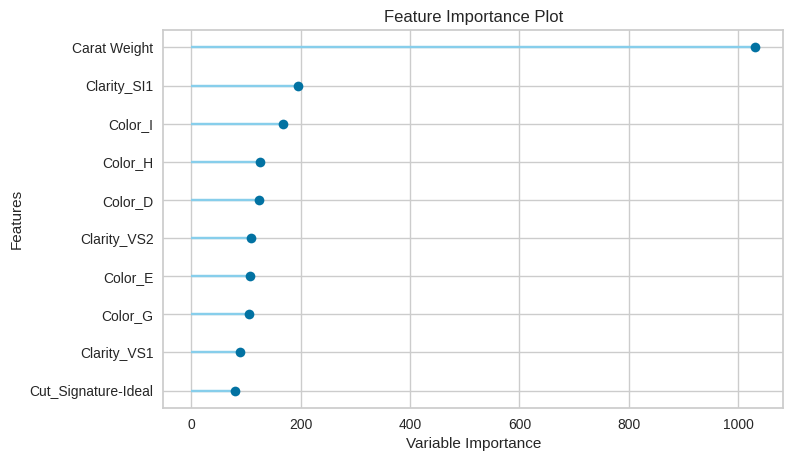

In [ ]:
# check feature importance
plot_model(lightgbm, plot = 'feature')

Guardar  Modelo 

In [ ]:
# finalize the model
final_best = finalize_model(lightgbm)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                                                          min_child_weight=0.001,
                               